In [6]:
import pandas as pd

#load the dataset
url = 'C:\\Users\\shahr\\Downloads\\baseball.csv'
data =pd.read_csv(url)

#display the first few rows
print(data.head())

#display summary statistics
print(data.describe())

#Check for missing values
print(data.isnull().sum())

    W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  SHO  \
0  95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2    8   
1  83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   12   
2  81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   10   
3  76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7    9   
4  74  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   12   

   SV    E  
0  56   88  
1  45   86  
2  38   79  
3  37  101  
4  35   86  
                W           R           AB            H          2B  \
count   30.000000   30.000000    30.000000    30.000000   30.000000   
mean    80.966667  688.233333  5516.266667  1403.533333  274.733333   
std     10.453455   58.761754    70.467372    57.140923   18.095405   
min     63.000000  573.000000  5385.000000  1324.000000  236.000000   
25%     74.000000  651.250000  5464.000000  1363.000000  262.250000   
50%     8

In [9]:
#handle missing values (if any)
data.fillna(data.mean(), inplace=True)

#check data types
print(data.dtypes)

#Normalize/scale features (if necessary)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features = data.drop(columns=['W']) #Assuming 'W' is the target value
scaled_features = scaler.fit_transform(features)

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object


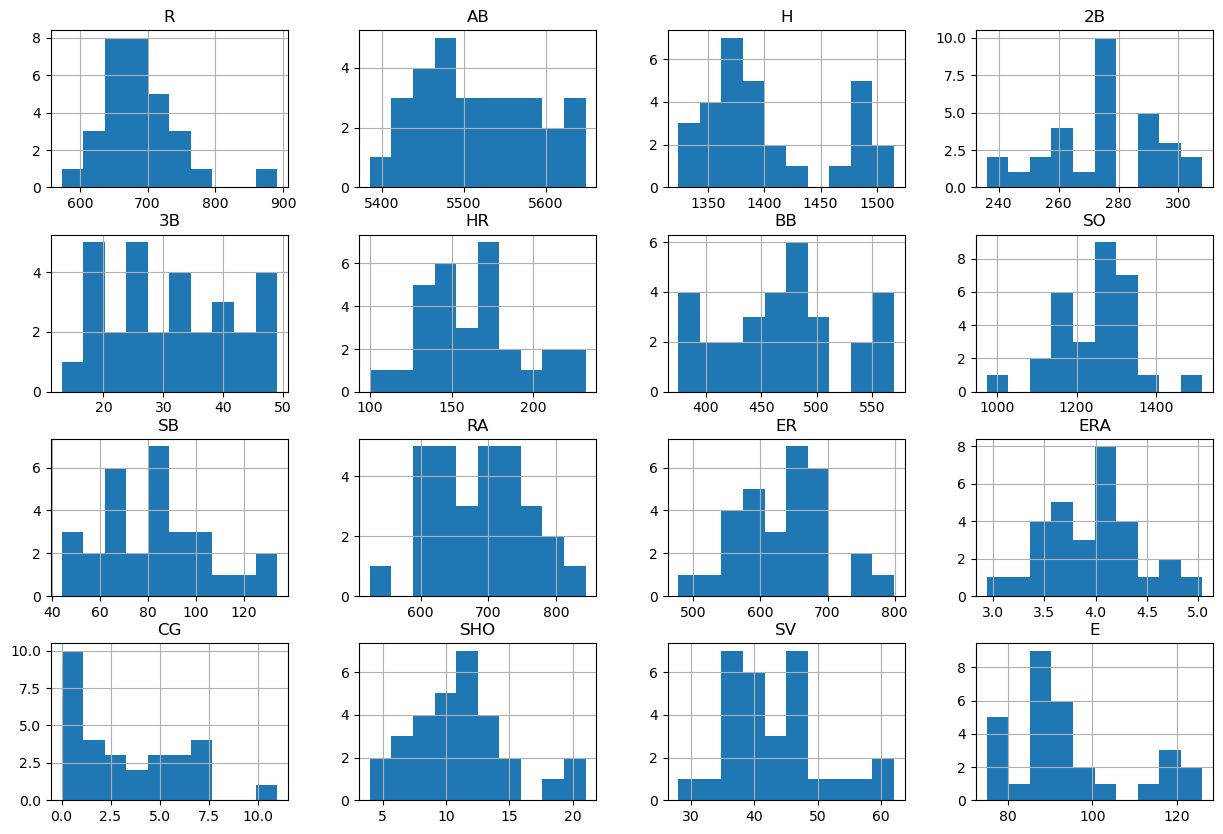

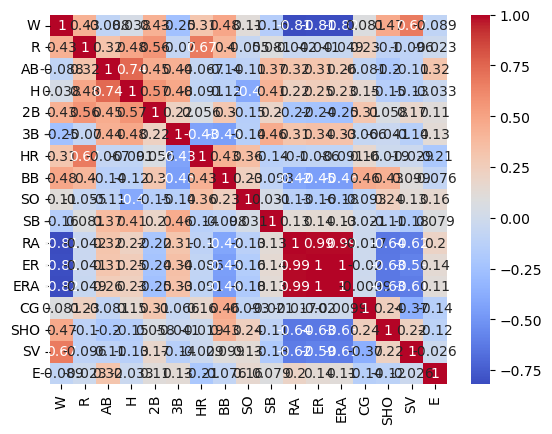

C:\Users\shahr\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shahr\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shahr\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shahr\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

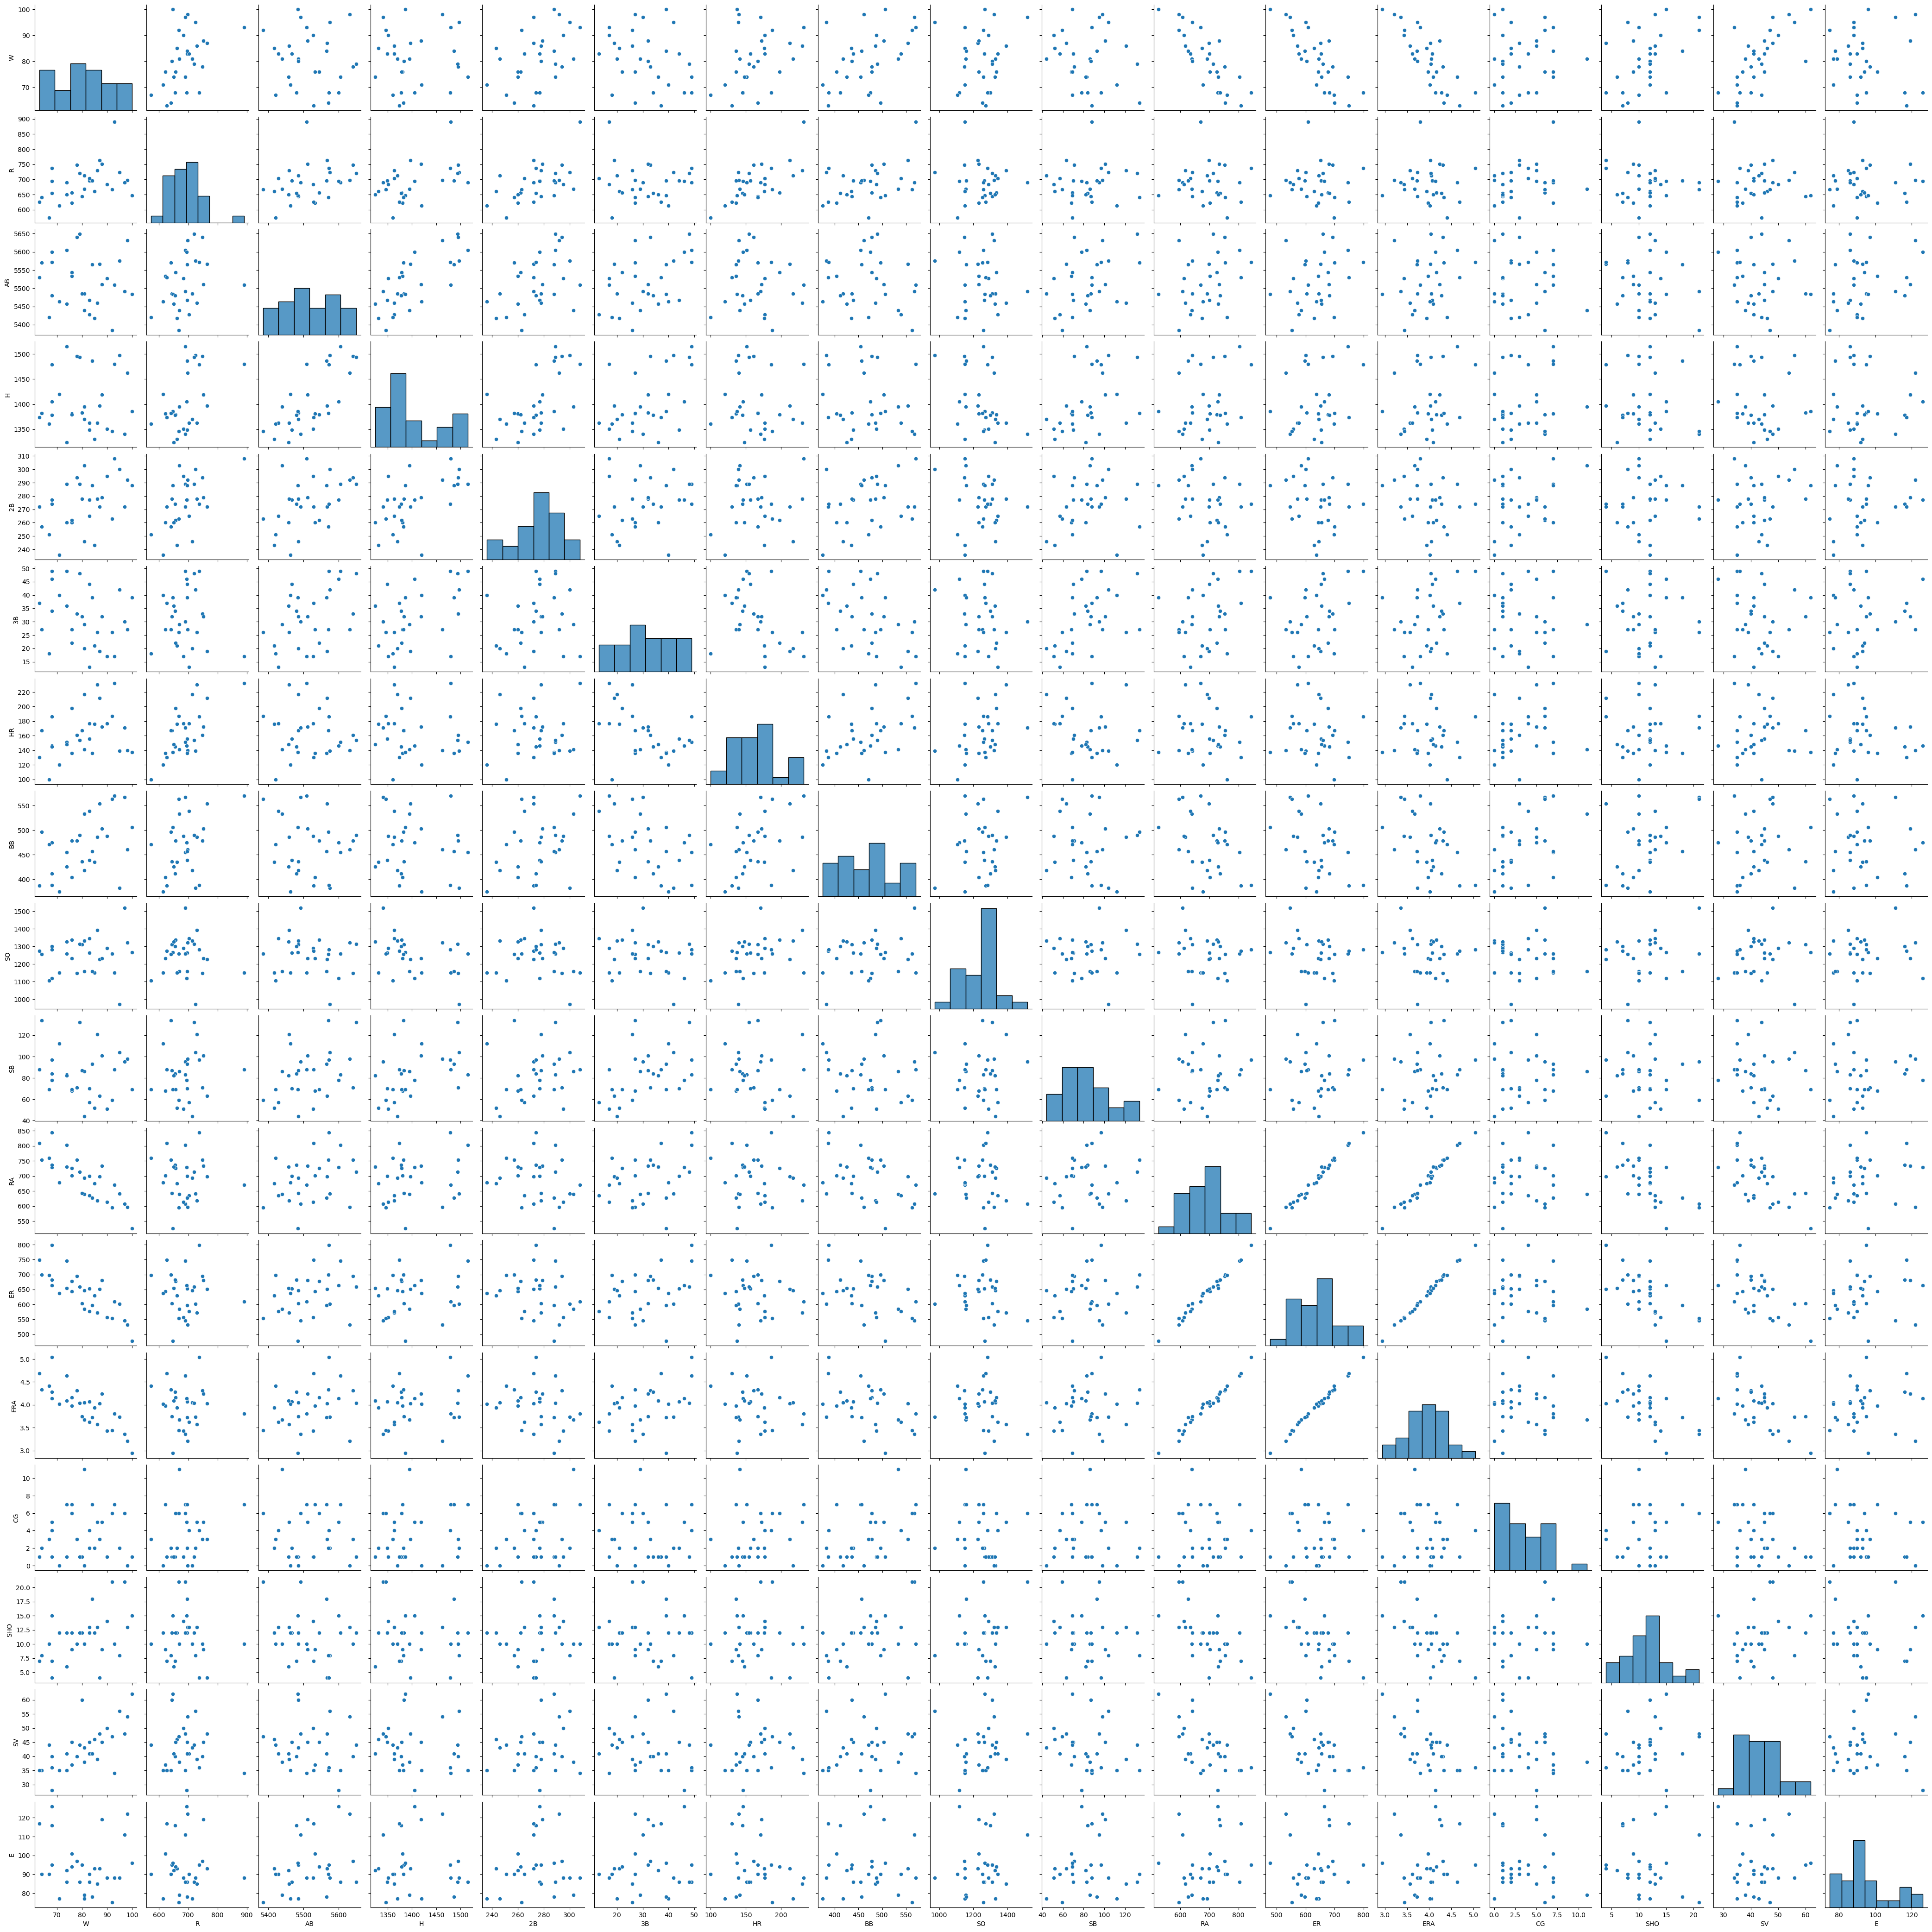

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

#visualize feature distributions
features.hist(figsize=(15,10))
plt.show()

corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

#Pair plot
sns.pairplot(data)
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

#split the data
x_train,x_test,y_train,y_test = train_test_split(scaled_features, data['W'], test_size=0.2, random_state=42)

#Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

#Train and evalute models
for name,model in models.items():
    model.fit(x_train,y_train)
    predictions = model.predict(x_test)
    mae = mean_absolute_error(y_test, predictions)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    print(f'{name} - MAE: {mae}, RMSE: {rmse}')

Linear Regression - MAE: 3.892999136999857, RMSE: 5.286116959230827
Random Forest - MAE: 5.75333333333333, RMSE: 7.184248974898719


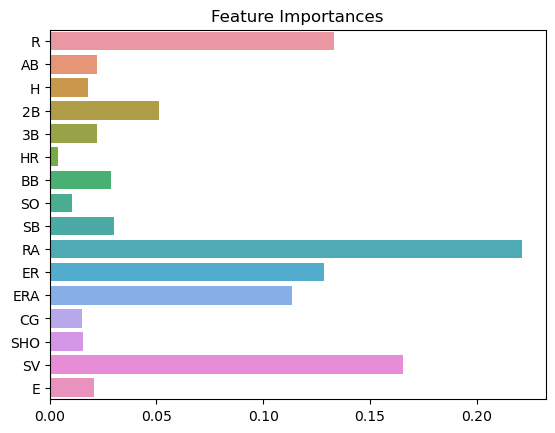

In [16]:
#Feature importance for Random Forest
rf = models['Random Forest']
importances = rf.feature_importances_

#plot feature importances
sns.barplot(x=importances, y=features.columns)
plt.title('Feature Importances')
plt.show()

In [17]:
import joblib

#Save the model
joblib.dump(rf, 'random_forest_.pkl')

#conclusion
print("Model training and evaluation complete, The Random Forest model was saved as 'random_forest_model.pkl'.")


Model training and evaluation complete, The Random Forest model was saved as 'random_forest_model.pkl'.
